In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r'C:\Users\LENOVO\Downloads\Datasets\Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = dataset.iloc[:, [3,4]]

In [5]:
from sklearn.cluster import KMeans

In [6]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = None)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Wi

In [7]:
wcss

[269981.28,
 182440.30762987013,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37271.88623658949,
 30241.343617936585,
 25044.967764018933,
 21850.165282585636,
 19676.6125856028]

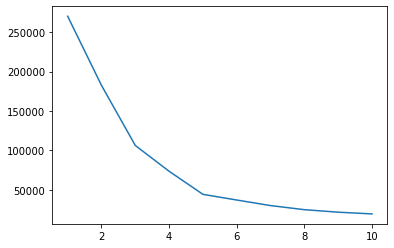

In [8]:
plt.plot(range(1,11), wcss)

In [9]:
kmeans = KMeans(n_clusters = 5, init='k-means++', random_state = None)
y_kmeans = kmeans.fit_predict(X)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [11]:
X['cluster'] = y_kmeans
X.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9212\16695583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = y_kmeans


,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [20]:
X.cluster.value_counts()

2    81
0    39
1    35
4    23
3    22
Name: cluster, dtype: int64

In [12]:
kmeans.cluster_centers_

array([[86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [13]:
df_0 = X[X.cluster == 0]
df_1 = X[X.cluster == 1]
df_2 = X[X.cluster == 2]
df_3 = X[X.cluster == 3]
df_4 = X[X.cluster == 4]

In [15]:
X.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)', 'cluster'], dtype='object')

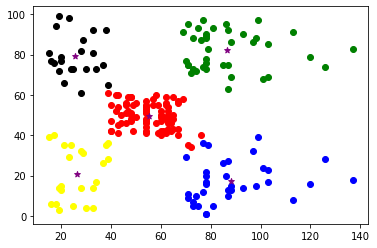

In [16]:
plt.scatter(df_0['Annual Income (k$)'], df_0['Spending Score (1-100)'], color = 'green')
plt.scatter(df_1['Annual Income (k$)'], df_1['Spending Score (1-100)'], color = 'blue')
plt.scatter(df_2['Annual Income (k$)'], df_2['Spending Score (1-100)'], color = 'red')
plt.scatter(df_3['Annual Income (k$)'], df_3['Spending Score (1-100)'], color = 'black')
plt.scatter(df_4['Annual Income (k$)'], df_4['Spending Score (1-100)'], color = 'yellow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'Centeroids')

In [22]:
labels = kmeans.labels_

In [23]:
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [21]:
from sklearn.metrics import silhouette_score

In [24]:
silhouette_score(X, labels)

0.5543894101439757

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_clusters' : [3,5,7],
             'init' : ['k-means++', 'random'],
             'max_iter' : [20,50,100]}

kmeans = KMeans()

In [26]:
grid_search = GridSearchCV(estimator = kmeans, param_grid = param_grid, cv = 2)
grid_search.fit(X)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Wi

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Wi

GridSearchCV(cv=2, estimator=KMeans(),
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [20, 50, 100], 'n_clusters': [3, 5, 7]})

In [27]:
grid_search.best_params_

{'init': 'random', 'max_iter': 100, 'n_clusters': 7}

In [28]:
grid_search.best_score_

-147758.08980510046